# Smoothing and Sharpening operations on images using Frequency Domain Filters

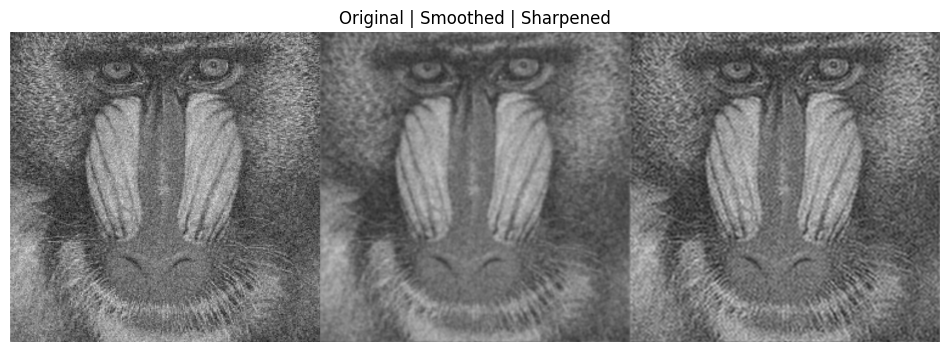

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_gaussian_filter(image, sigma):
    # Convert image to float32 for Fourier Transform
    image = np.float32(image)

    # Perform Fourier Transform
    frequency_domain = cv2.dft(image, flags=cv2.DFT_COMPLEX_OUTPUT)

    # Shift the zero-frequency component to the center of the spectrum
    shifted_frequency_domain = np.fft.fftshift(frequency_domain)

    # Create Gaussian filter mask
    rows, cols = image.shape
    crow, ccol = rows // 2, cols // 2
    mask = np.zeros((rows, cols, 2), np.float32)
    for i in range(rows):
        for j in range(cols):
            mask[i, j] = np.exp(-((i - crow) ** 2 + (j - ccol) ** 2) / (2 * sigma ** 2))

    # Apply the Gaussian filter in the frequency domain
    filtered_frequency_domain = shifted_frequency_domain * mask

    # Shift the zero-frequency component back to the corner
    shifted_filtered_frequency_domain = np.fft.fftshift(filtered_frequency_domain)

    # Perform Inverse Fourier Transform to obtain the filtered image
    filtered_image = cv2.idft(shifted_filtered_frequency_domain, flags=cv2.DFT_SCALE | cv2.DFT_REAL_OUTPUT)

    # Convert the filtered image back to uint8
    filtered_image = np.uint8(filtered_image)

    return filtered_image

def apply_sharpening_filter(image, strength):
    # Convert image to float32 for Fourier Transform
    image = np.float32(image)

    # Perform Fourier Transform
    frequency_domain = cv2.dft(image, flags=cv2.DFT_COMPLEX_OUTPUT)

    # Shift the zero-frequency component to the center of the spectrum
    shifted_frequency_domain = np.fft.fftshift(frequency_domain)

    # Create high-pass filter mask
    rows, cols = image.shape
    crow, ccol = rows // 2, cols // 2
    mask = np.zeros((rows, cols, 2), np.float32)
    mask[crow - strength:crow + strength, ccol - strength:ccol + strength] = 1

    # Apply the high-pass filter in the frequency domain
    filtered_frequency_domain = shifted_frequency_domain * mask

    # Shift the zero-frequency component back to the corner
    shifted_filtered_frequency_domain = np.fft.fftshift(filtered_frequency_domain)

    # Perform Inverse Fourier Transform to obtain the filtered image
    filtered_image = cv2.idft(shifted_filtered_frequency_domain, flags=cv2.DFT_SCALE | cv2.DFT_REAL_OUTPUT)

    # Convert the filtered image back to uint8
    filtered_image = np.uint8(filtered_image)

    return filtered_image

# Load the input image
image_path = 'Images/exp5/monkey.jpg'
input_image = cv2.imread(image_path, 0)  # Load the image in grayscale

# Apply Gaussian filter
sigma = 50  # Adjust the value to control the amount of smoothing
smoothed_image = apply_gaussian_filter(input_image, sigma)

# Apply sharpening filter
strength = 80  # Adjust the value to control the strength of sharpening
sharpened_image = apply_sharpening_filter(input_image, strength)

# Display the original image and the filtered images side by side
combined_image = np.hstack((input_image, smoothed_image, sharpened_image))
plt.figure(figsize=(12,6))
plt.imshow(combined_image, cmap='gray')
plt.title("Original | Smoothed | Sharpened")
plt.axis('off')
plt.show()

# Save the filtered images (optional)
# smoothed_path = 'smoothed_image.jpg'
# sharpened_path = 'sharpened_image.jpg'
# cv2.imwrite(smoothed_path, smoothed_image)
# cv2.imwrite(sharpened_path, sharpened_image)
# print(f"Smoothed image saved at: {smoothed_path}")
# print(f"Sharpened image saved at: {sharpened_path}")

# Open Ended Problem

Images: 
- 0 => smoothening data1.png 
- 1 => smoothening data2.png 
- 2 => smoothening data3.png 
- 3 => smoothening data4.png 
- 4 => smoothening data5.png 



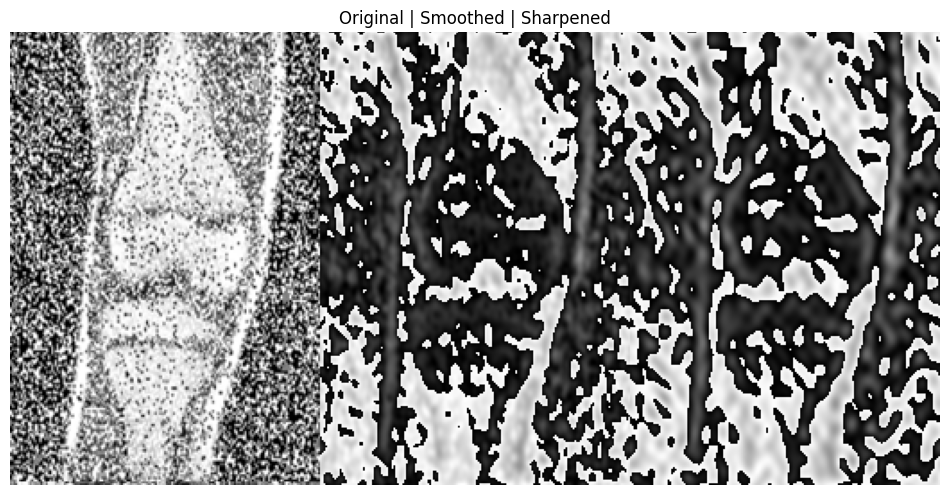

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Image paths
img_paths = [
    'Images/exp3/smoothening data1.png',
    'Images/exp3/smoothening data2.png',
    'Images/exp3/smoothening data3.png',
    'Images/exp3/smoothening data4.png',
    'Images/exp3/smoothening data5.png',
]

# Function to apply Gaussian filtering
def apply_gaussian_filter(image, sigma):
    # Convert image to float32 for Fourier Transform
    image = np.float32(image)

    # Perform Fourier Transform
    frequency_domain = cv2.dft(image, flags=cv2.DFT_COMPLEX_OUTPUT)

    # Shift the zero-frequency component to the center of the spectrum
    shifted_frequency_domain = np.fft.fftshift(frequency_domain)

    # Create Gaussian filter mask
    rows, cols = image.shape
    crow, ccol = rows // 2, cols // 2
    mask = np.zeros((rows, cols, 2), np.float32)
    for i in range(rows):
        for j in range(cols):
            mask[i, j] = np.exp(-((i - crow) ** 2 + (j - ccol) ** 2) / (2 * sigma ** 2))

    # Apply the Gaussian filter in the frequency domain
    filtered_frequency_domain = shifted_frequency_domain * mask

    # Shift the zero-frequency component back to the corner
    shifted_filtered_frequency_domain = np.fft.fftshift(filtered_frequency_domain)

    # Perform Inverse Fourier Transform to obtain the filtered image
    filtered_image = cv2.idft(shifted_filtered_frequency_domain, flags=cv2.DFT_SCALE | cv2.DFT_REAL_OUTPUT)

    # Convert the filtered image back to uint8
    filtered_image = np.uint8(filtered_image)

    return filtered_image

# Function to apply sharpening
def apply_sharpening_filter(image, strength):
    # Convert image to float32 for Fourier Transform
    image = np.float32(image)

    # Perform Fourier Transform
    frequency_domain = cv2.dft(image, flags=cv2.DFT_COMPLEX_OUTPUT)

    # Shift the zero-frequency component to the center of the spectrum
    shifted_frequency_domain = np.fft.fftshift(frequency_domain)

    # Create high-pass filter mask
    rows, cols = image.shape
    crow, ccol = rows // 2, cols // 2
    mask = np.zeros((rows, cols, 2), np.float32)
    mask[crow - strength:crow + strength, ccol - strength:ccol + strength] = 1

    # Apply the high-pass filter in the frequency domain
    filtered_frequency_domain = shifted_frequency_domain * mask

    # Shift the zero-frequency component back to the corner
    shifted_filtered_frequency_domain = np.fft.fftshift(filtered_frequency_domain)

    # Perform Inverse Fourier Transform to obtain the filtered image
    filtered_image = cv2.idft(shifted_filtered_frequency_domain, flags=cv2.DFT_SCALE | cv2.DFT_REAL_OUTPUT)

    # Convert the filtered image back to uint8
    filtered_image = np.uint8(filtered_image)

    return filtered_image

# Load the input image
# Choose the image
print('Images: \n'
    '- 0 => smoothening data1.png \n'
    '- 1 => smoothening data2.png \n'
    '- 2 => smoothening data3.png \n'
    '- 3 => smoothening data4.png \n'
    '- 4 => smoothening data5.png \n'
)
image_id = int(input('Enter the image id: '))
input_image = cv2.imread(img_paths[image_id], 0)  # Load the image in grayscale

# Apply Gaussian filter
sigma = 20  # Adjust the value to control the amount of smoothing
smoothed_image = apply_gaussian_filter(input_image, sigma)

# Apply sharpening filter
strength = 20  # Adjust the value to control the strength of sharpening
sharpened_image = apply_sharpening_filter(input_image, strength)

# Display the original image and the filtered images side by side
combined_image = np.hstack((input_image, smoothed_image, sharpened_image))
plt.figure(figsize=(12,6))
plt.imshow(combined_image, cmap='gray')
plt.title("Original | Smoothed | Sharpened")
plt.axis('off')
plt.show()